# Build a fashion recommender that takes an image and a text prompt (like "red sunglass") and returns visually and semantically similar items.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
print(os.listdir("/kaggle/input"))

In [4]:
import os
import pandas as pd

# Paths
data_dir = "/kaggle/input/fashion-product-images-dataset/fashion-dataset"
image_dir = os.path.join(data_dir, "images")
csv_path = os.path.join(data_dir, "styles.csv") 

In [7]:
csv_path

'/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv'

In [11]:
# Load metadata
df= pd.read_csv(csv_path, usecols=['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName'])

In [12]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [15]:
# Drop missing data
df = df.dropna(subset=["id", "productDisplayName"])

In [16]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [17]:
# Create filename column for image matching
df["filename"] = df["id"].astype(str) + ".jpg"
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
...,...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg


In [18]:
# Keep only entries with actual image files
df = df[df["filename"].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))]

In [19]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
...,...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg


In [20]:
df = df.reset_index(drop=True)

In [21]:
# View some samples
df[["filename", "productDisplayName"]].head()

,filename,productDisplayName
0,15970.jpg,Turtle Check Men Navy Blue Shirt
1,39386.jpg,Peter England Men Party Blue Jeans
2,59263.jpg,Titan Women Silver Watch
3,21379.jpg,Manchester United Men Solid Black Track Pants
4,53759.jpg,Puma Men Grey T-shirt


In [22]:
!pip install transformers accelerate --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 5.4 MB/s eta 0:00:00:00:0100:01


In [23]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


2025-06-24 04:00:48.382564: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750737648.619343      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750737648.709316      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

## Image Feature Extraction with CLIP

In [24]:
'''
This step processes a limited number of fashion images (e.g., the first 1000) to generate their visual feature vectors using CLIP.

Each image is opened and converted to RGB to ensure consistent input format.

The image is then passed through CLIP’s preprocessing pipeline to resize, normalize, and tensorize it.

The processed image is input into the CLIP model, which outputs a 512-dimensional feature vector representing the image's semantic content — such as style, color, texture, and shape.

These vectors are normalized (unit length) to prepare them for cosine similarity comparison later.

Each valid feature vector is stored in a list, alongside the corresponding image path. Invalid or unreadable images are skipped.

Finally, all vectors are stacked together into a single matrix of shape [N, 512], where N is the number of successfully processed images.

At this point, the system has a searchable index of embeddings representing each image in the dataset.
'''


image_paths = [os.path.join(image_dir, fname) for fname in df["filename"][:1000]]

image_features = []
valid_paths = []

for path in tqdm(image_paths):
    try:
        image = Image.open(path).convert("RGB")
        inputs = processor(images=image, return_tensors="pt").to(device)

        with torch.no_grad():
            feats = model.get_image_features(**inputs)
            feats = feats / feats.norm(p=2, dim=-1, keepdim=True)
            image_features.append(feats.cpu())
            valid_paths.append(path)
    except Exception as e:
        continue

image_features = torch.cat(image_features, dim=0)


100%|██████████| 1000/1000 [03:11<00:00,  5.22it/s]


## Create a Query from Image + Text

In [30]:
'''
Now we build a query embedding using both an image and a text prompt.

A sample image (e.g., a fashion item the user is interested in) is opened and preprocessed.

A text description (e.g., "a blue watch") is tokenized for input into the CLIP model.

CLIP generates two separate 512-dimensional embeddings:

One representing the visual semantics of the query image

Another representing the semantic meaning of the text description

Both vectors are normalized and then averaged to form a joint multimodal query embedding.

This combined embedding captures both what the item looks like and what the user is conceptually looking for — enabling a visual + textual search.
'''

# Query input
query_image_path = valid_paths[20]
query_text = "a blue watch"

# Process both
query_image = Image.open(query_image_path).convert("RGB")
inputs_img = processor(images=query_image, return_tensors="pt").to(device)
inputs_txt = processor(text=[query_text], return_tensors="pt").to(device)

with torch.no_grad():
    image_feat = model.get_image_features(**inputs_img)
    text_feat = model.get_text_features(**inputs_txt)

    image_feat = image_feat / image_feat.norm(p=2, dim=-1, keepdim=True)
    text_feat = text_feat / text_feat.norm(p=2, dim=-1, keepdim=True)

    combined_feat = (image_feat + text_feat) / 2
    combined_feat = combined_feat / combined_feat.norm(p=2, dim=-1, keepdim=True)


## Recommend Top-N Similar Items


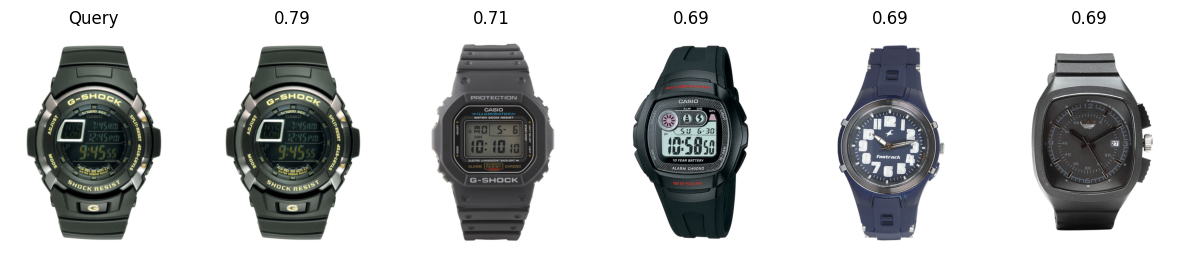

In [31]:
'''
This step computes similarities and shows the most relevant results.

The combined query embedding is compared against all previously extracted image embeddings using cosine similarity — a measure of angle (not distance) between vectors, ideal for high-dimensional data.

Similarity scores are sorted, and the top N (e.g., 5) most similar items are identified.

The query image is displayed alongside the top recommended items using matplotlib, with each recommendation annotated with its similarity score.
'''

from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Compute similarity
sims = cosine_similarity(combined_feat.cpu(), image_features)[0]
top_indices = sims.argsort()[::-1][:5]

# Display results
def show_images(query_path, results):
    plt.figure(figsize=(15, 3))
    plt.subplot(1, 6, 1)
    plt.imshow(Image.open(query_path))
    plt.title("Query")
    plt.axis("off")

    for i, idx in enumerate(results):
        plt.subplot(1, 6, i + 2)
        plt.imshow(Image.open(valid_paths[idx]))
        plt.title(f"{sims[idx]:.2f}")
        plt.axis("off")

    plt.show()

show_images(query_image_path, top_indices)


## Another Example

In [36]:
# Query input
query_image_path = valid_paths[80]
query_text = "red sunglass"

# Process both
query_image = Image.open(query_image_path).convert("RGB")
inputs_img = processor(images=query_image, return_tensors="pt").to(device)
inputs_txt = processor(text=[query_text], return_tensors="pt").to(device)

with torch.no_grad():
    image_feat = model.get_image_features(**inputs_img)
    text_feat = model.get_text_features(**inputs_txt)

    image_feat = image_feat / image_feat.norm(p=2, dim=-1, keepdim=True)
    text_feat = text_feat / text_feat.norm(p=2, dim=-1, keepdim=True)

    combined_feat = (image_feat + text_feat) / 2
    combined_feat = combined_feat / combined_feat.norm(p=2, dim=-1, keepdim=True)

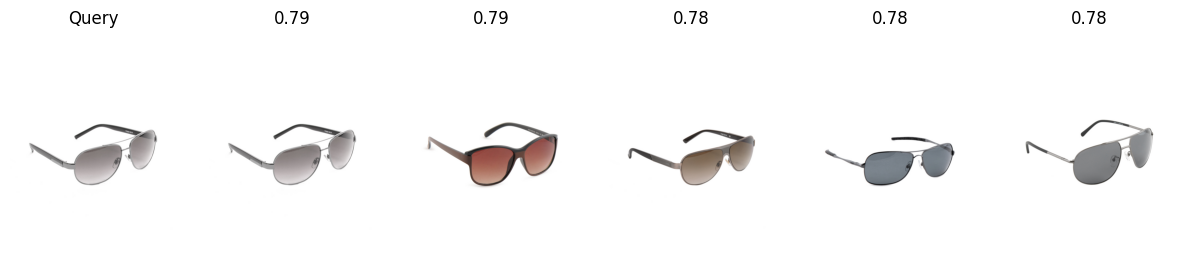

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Compute similarity
sims = cosine_similarity(combined_feat.cpu(), image_features)[0]
top_indices = sims.argsort()[::-1][:5]

# Display results
def show_images(query_path, results):
    plt.figure(figsize=(15, 3))
    plt.subplot(1, 6, 1)
    plt.imshow(Image.open(query_path))
    plt.title("Query")
    plt.axis("off")

    for i, idx in enumerate(results):
        plt.subplot(1, 6, i + 2)
        plt.imshow(Image.open(valid_paths[idx]))
        plt.title(f"{sims[idx]:.2f}")
        plt.axis("off")

    plt.show()

show_images(query_image_path, top_indices)
